In [1]:
using DataFrames
using DataFramesMeta
using CSV


In [2]:
d11 = []
for seed in [111, 112, 113]
    push!(d11, CSV.read("x_trust-1-lo_riskeff-1-lo_know-1-lo_comm-1-lo_$seed/log.txt", delim="\t", ignorerepeated=true, DataFrame))
end

d12 = []
for seed in [111, 112, 113]
    push!(d12, CSV.read("x_trust-1-lo_riskeff-2-hi_know-1-lo_comm-1-lo_$seed/log.txt", delim="\t", ignorerepeated=true, DataFrame))
end

d21 = []
for seed in [111, 112, 113]
    push!(d21, CSV.read("x_trust-2-hi_riskeff-1-lo_know-1-lo_comm-1-lo_$seed/log.txt", delim="\t", ignorerepeated=true, DataFrame))
end

d22 = []
for seed in [111, 112, 113]
    push!(d22, CSV.read("x_trust-2-hi_riskeff-2-hi_know-1-lo_comm-1-lo_$seed/log.txt", delim="\t", ignorerepeated=true, DataFrame))
end;


In [3]:
function cr_ribbon_data(dfs, col)
    dat = map(dfs) do d
        d[!, col]
    end
    
    mi = Float64[]
    me = Float64[]
    ma = Float64[]
    for i in 1:length(dat[1])
        a, b, c = dat[1][i], dat[2][i], dat[3][i]
        mean = (a+b+c)/3
        push!(me, (a+b+c)/3)
        push!(mi, min(a, b, c)-mean)
        push!(ma, max(a, b, c)-mean)
        
    end
       
    mi, me, ma
end
    

cr_ribbon_data (generic function with 1 method)

In [4]:
using Plots

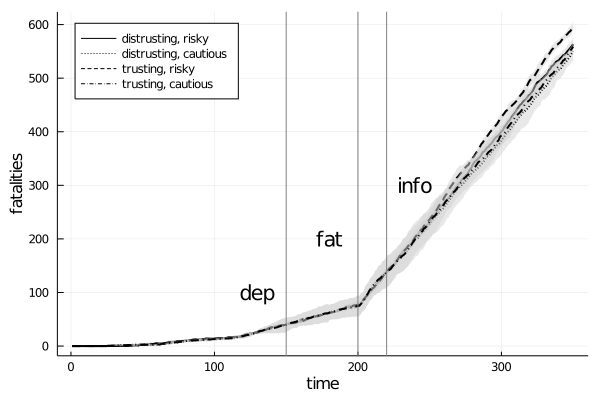

In [5]:
dat = cr_ribbon_data(d11, :n_dead)

plot(dat[2], ribbon=[dat[1], dat[3]], line=(2, :black), fillcolor=:lightgray, label="distrusting, risky")

dat = cr_ribbon_data(d12, :n_dead)

plot!(dat[2], ribbon=[dat[1], dat[3]], line=(2,:dot, :black), fillcolor=:lightgray, label="distrusting, cautious")

dat = cr_ribbon_data(d21, :n_dead)

plot!(dat[2], ribbon=[dat[1], dat[3]], line=(2, :dash, :black), fillcolor=:lightgray, label="trusting, risky")

dat = cr_ribbon_data(d22, :n_dead)

plot!(dat[2], ribbon=[dat[1], dat[3]], line=(2, :dashdot, :black), fillcolor=:lightgray, label="trusting, cautious",
    xlabel = "time", ylabel = "fatalities", legend=:topleft)

vline!([150, 200, 220], line=:gray, label="")
annotate!(130, 100, Plots.text("dep"))
annotate!(180, 200, Plots.text("fat"))
annotate!(240, 300, Plots.text("info"))

In [12]:
savefig("plot_deaths_info-campaign.pdf")

In [ ]:
dat = cr_ribbon_data(d111, :n_arrived)

plot(dat[2], ribbon=[dat[1], dat[3]], line=(2, :black), fillcolor=:lightgray, label="risky, uninformed")

dat = cr_ribbon_data(d122, :n_arrived)

plot!(dat[2], ribbon=[dat[1], dat[3]], line=(2,:dot, :black), fillcolor=:lightgray, label="risky, informed")

dat = cr_ribbon_data(d211, :n_arrived)

plot!(dat[2], ribbon=[dat[1], dat[3]], line=(2, :dash, :black), fillcolor=:lightgray, label="cautious, uninformed")

dat = cr_ribbon_data(d222, :n_arrived)

plot!(dat[2], ribbon=[dat[1], dat[3]], line=(2, :dashdot, :black), fillcolor=:lightgray, label="cautious, informed",
    xlabel = "time", ylabel = "arrivals", legend=:topleft)

vline!([150, 200], line=:gray, label="")
annotate!(130, 1500, Plots.text("dep"))
annotate!(180, 2500, Plots.text("fat"))

In [ ]:
savefig("plot_arrivals_depxfat.pdf")